In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [5]:
from sklearn.datasets import load_boston
boston = load_boston()
X=pd.DataFrame(boston['data'],columns=boston['feature_names'])
y=pd.DataFrame(boston['target'],columns=['price'])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaller=StandardScaler()
X_trein_scaled=pd.DataFrame(scaller.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaller.transform(X_test),columns=X_test.columns)


In [8]:
from sklearn.manifold import TSNE 
tsne=TSNE(n_components=2,learning_rate=250,random_state=42)
X_train_tsne=tsne.fit_transform(X_trein_scaled)

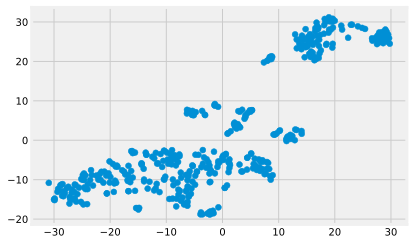

In [9]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1])
plt.show()

Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [11]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3, max_iter=100,random_state=42)
train_labels=model.fit_predict(X_trein_scaled)
centers=scaller.inverse_transform(model.cluster_centers_)



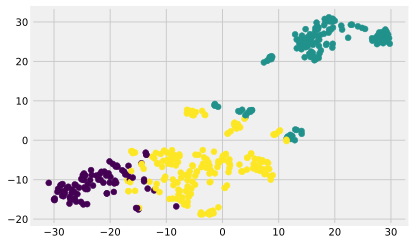

In [15]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.show()

In [18]:
print('Кластер 0')
print(f'price: {y_train[train_labels == 0].mean()}' )
print(f'CRIM:{X_train.loc[train_labels == 0,"CRIM"].mean()} ')

Кластер 0
price: price    27.788372
dtype: float64
CRIM:0.07356558139534884 


In [19]:
print('Кластер 1')
print(f'price: {y_train[train_labels == 1].mean()}' )
print(f'CRIM:{X_train.loc[train_labels == 1,"CRIM"].mean()} ')

Кластер 1
price: price    16.165354
dtype: float64
CRIM:10.797028425196851 


In [20]:
print('Кластер 2')
print(f'price: {y_train[train_labels == 2].mean()}' )
print(f'CRIM:{X_train.loc[train_labels == 2,"CRIM"].mean()} ')

Кластер 2
price: price    24.958115
dtype: float64
CRIM:0.4216602094240837 


*Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных


In [23]:
test_labels = model.fit_predict(X_test_scaled)

In [24]:
print('Кластер 0')
print(f'price: {y_test[test_labels == 0].mean()}' )
print(f'CRIM:{X_test.loc[test_labels == 0,"CRIM"].mean()} ')

Кластер 0
price: price    33.871429
dtype: float64
CRIM:0.08618571428571427 


In [25]:
print('Кластер 1')
print(f'price: {y_test[test_labels == 1].mean()}' )
print(f'CRIM:{X_test.loc[test_labels == 1,"CRIM"].mean()} ')

Кластер 1
price: price    21.55283
dtype: float64
CRIM:0.25200716981132076 


In [26]:
print('Кластер 2')
print(f'price: {y_test[test_labels == 2].mean()}' )
print(f'CRIM:{X_test.loc[test_labels == 2,"CRIM"].mean()} ')

Кластер 2
price: price    16.437143
dtype: float64
CRIM:10.165531142857143 
